# **Text Mining Project - Group 8** 

|      |     Student Name     |     Student ID     |
|---   |         ---          |           ---          |
| 1    |      Mariana Cabral    |       20230532       |
| 2    |      Sofia Pereira       |       20230568	       |
|3| Susana Pires |20230540 |

## Goal: 
**Implement an NLP Classification model able to predict, for each property, if it was unlisted (1) in the next quarter or is still listed (0)**


Docs for organization: <br>
https://docs.google.com/document/d/1cU9rkjof2L1qmxQwBYIpzOMezUiTN0xATmCpiLne1_c/edit?usp=sharing

Link for report: <br>
https://liveeduisegiunl-my.sharepoint.com/:w:/g/personal/20230568_novaims_unl_pt/Ee5Xaa2zAJtOj_6C7T8apkgB3_gYWxfbe4SQxlCq9Ld0PA?e=YFEFAF

## **1. Import Libraries &  Documents:**

### Libraries:

In [16]:
# % installs on environment  // ! installs on base
# https://stackoverflow.com/questions/65547021/difference-between-pip-and-pip-in-python-jupyter-notebook-and-colab

# !pip install bs4
# !pip install nltk
# !pip install langdetect
# !pip install lxml
#!pip install spacy
#! pip install emoji

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

# Preprocessing and Feature Extraction
from bs4 import BeautifulSoup #remove html tags
from langdetect import detect, LangDetectException

# NLTK
import os
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from tqdm import tqdm
import spacy
import emoji

# SKLEARN
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sofiapereira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sofiapereira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sofiapereira/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Import Datasets:

In [18]:
train = pd.read_excel('Project Corpora/train.xlsx')
train_reviews = pd.read_excel('Project Corpora/train_reviews.xlsx')
test= pd.read_excel('Project Corpora/test.xlsx')
test_reviews = pd.read_excel('Project Corpora/test_reviews.xlsx')

In [19]:
train.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [20]:
train_reviews.head()

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [21]:
test.head()

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [22]:
test_reviews.head()

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


### Documents (Copies of the Datasets):

The **Corpora** is composed by the following documents:

•  _`airbnb_df_train `_(train) (6,248 lines): Contains the Airbnb and host descriptions
(“description” and “host_about” columns), as well as the information regarding the
property listing status (“unlisted” column). A property is considered unlisted (1) if
it got removed from the quarterly Airbnb list and it is considered listed (0) if it
remains on that same list.

• _`airbnb_df_train_reviews`_ (train_reviews) (361,281 lines): This file has all the guests’
comments made to each Airbnb property. Note that there can be more than one
comment per property, not all properties have comments, and comments can
appear in many languages.

• _`airbnb_df_test`_ (test) (695 lines): The structure of this dataset is the same as the train set, except that it does not contain the “unlisted” column.

• _`airbnb_df_test_reviews `_ (test_reviews) (41,866 lines): same srtucter as the train reviews set, but the comments correspond to the properties
present on the test set.

**Important notes** about the relation between  _`airbnb_df_train `_ &  _`airbnb_df_train_reviews`_:
- There can be more than one comment per listing;
- Not all properties have comments;
- Comments can appear in many languages;

In [23]:
airbnb_df_train = train.copy()
airbnb_df_train_reviews = train_reviews.copy()
airbnb_df_test= test.copy()
airbnb_df_test_reviews = test_reviews.copy()

----

## **2. Data Exploration**

<div class="alert alert-block alert-success"> <a id = "preprocessing"></a>

**Requirements**
- Analyze the corpora;  (DONE)
- Provide Conclusions; (DONE)
- Provide Visual Information (bar chart, word cloud…) with context;

There are no extra points.

Reference: 
- https://www.kaggle.com/code/harshsingh2209/complete-guide-to-eda-on-text-data
- https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
- https://spotintelligence.com/2023/09/15/exploratory-data-analysis-nlp/

###  **2.1 Documents General Analysis:**

####  **2.1.1 airbnb_df_train & airbnb_df_test**

We start by checking if the indexes in *airbnb_df_train* are unique:

In [24]:
airbnb_df_train['index'].nunique()

6248

Since 6248 is equal to the number of total lines, there are no duplicated indexes and so the column "index"  can be turned into the index of the dataframe corresponding to the "ID" of a certain house:

In [25]:
airbnb_df_train.set_index('index', inplace = True)
airbnb_df_train.head()

,description,host_about,unlisted
index,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


Let's do the same verification for *airbnb_df_test*:

In [26]:
airbnb_df_test['index'].nunique()

695

We came to the same conclusion, so the same thing is done for the test set:

In [27]:
airbnb_df_test.set_index('index', inplace = True)
airbnb_df_test.head()

,description,host_about
index,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
4,Charming Apartment Close to the Bay of Cascais...,:)
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


We then check for the size of our datasets:

In [28]:
airbnb_df_train.shape, airbnb_df_test.shape

((6248, 3), (695, 2))

We have **6248** records in the train dataset and **695** on the test.

Now let's check the **duplicates**:

In [29]:
airbnb_df_train.duplicated().sum()

192

There are also **192** duplicated entries in the train set.

In [30]:
duplicated_rows = airbnb_df_train[airbnb_df_train.duplicated(keep = False)]
duplicated_rows.head()

,description,host_about,unlisted
index,,,
17,"Set in a stunning seaside location, this luxur...",Going someplace new is always exciting. And wh...,0
45,"Welcome to this well-appointed, charming and v...",I do not spare any efforts when it comes to tr...,0
58,there are 4 rooms in this apartment. this room...,我喜欢旅游健身，喜欢交朋友，我是一名企业管理者，我热爱我的工作.,0
76,Nesha Guesthouse Lisbon is a surf & beach orie...,I'm an enthusiastic and active person who love...,0
78,"Located in Chiado district, one of the trendie...",Hi! Welcome to Lisbon Five Stars apartments. \...,0


In [31]:
airbnb_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6248 entries, 1 to 6248
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  6248 non-null   object
 1   host_about   6248 non-null   object
 2   unlisted     6248 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 195.2+ KB


As expected, the ``description`` and the ``host_about`` features are stored as strings, and the ``unlisted`` is stored as an integer. We can see that,  apparently, there are no missing values (or missing text) in any feature.

 **Assumptions:** 
- We will treat duplicated entries as different properties (as per indication of teachers).
- All our text fields have text in different languages (Portuguese, English, French...);


In [32]:
airbnb_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 1 to 695
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  695 non-null    object
 1   host_about   695 non-null    object
dtypes: object(2)
memory usage: 16.3+ KB


####  **2.1.2 airbnb_df_train_review & airbnb_df_test_review**

Let´s check the shape:

In [33]:
airbnb_df_train_reviews.shape, airbnb_df_test_reviews.shape

((361281, 2), (41866, 2))

We have **361281** reviews in train and **41866** in test.

This shows that the variable `comments` contains a lot more information than other variables. 
We now need to understand if this information is revelant/coherent for the problem.

**1) Does every house has comments?**


In [34]:
# Checking the unique values of the index and counting them
unique_indices = airbnb_df_train_reviews["index"].unique()

# Checking how many unique indexes are there. With this information we can see how many properties are in this dataset.
print("Total houses that have at least a comment in reviews:", len(unique_indices))

Total houses that have at least a comment in reviews: 4245


**No** => Since the total number of houses is 6248, and the different house indexes in reviews are 4245, we confirm that there are houses that do not have comments.

**2) Are comments important for  listing?**

In [35]:
# Get the set of house indices from the reviews dataset
reviewed_houses_indices = set(airbnb_df_train_reviews['index'])

# Get the set of all house indices from the houses dataset
all_houses_indices = set(train['index'])

# Find the houses with no comments
houses_with_no_comments_indices = all_houses_indices - reviewed_houses_indices

# Filter the houses dataset for houses with no comments
houses_with_no_comments = train[train['index'].isin(houses_with_no_comments_indices)]

houses_with_no_comments['unlisted'].value_counts()

unlisted
1    1441
0     562
Name: count, dtype: int64

In [36]:
houses_with_comments= train[train['index'].isin(reviewed_houses_indices)]
houses_with_comments['unlisted'].value_counts()

unlisted
0    3978
1     267
Name: count, dtype: int64

**Yes** 
* If unlisted=0, it indicates that the house remains listed in the next quarter, with a higher number of houses having comments.

* If unlisted=1, it signifies that the house is removed from the listings in the next quarter, with a higher number of houses having no comments.

* **Idea:** Having comments is crucial in determining whether a house will be listed in the next trimester.

In [37]:
airbnb_df_train_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361281 entries, 0 to 361280
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     361281 non-null  int64 
 1   comments  361279 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.5+ MB


There are 2 missing values (or missing text) in the feature coment.

In [38]:
airbnb_df_test_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41866 entries, 0 to 41865
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     41866 non-null  int64 
 1   comments  41866 non-null  object
dtypes: int64(1), object(1)
memory usage: 654.3+ KB


### **2.2 Feature Analysis**

####  **2.2.1 `unlisted`** (target variable)

In [39]:
airbnb_df_train['unlisted'].describe()

count    6248.000000
mean        0.273367
std         0.445724
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: unlisted, dtype: float64

In [40]:
airbnb_df_train['unlisted'].unique()

array([0, 1])

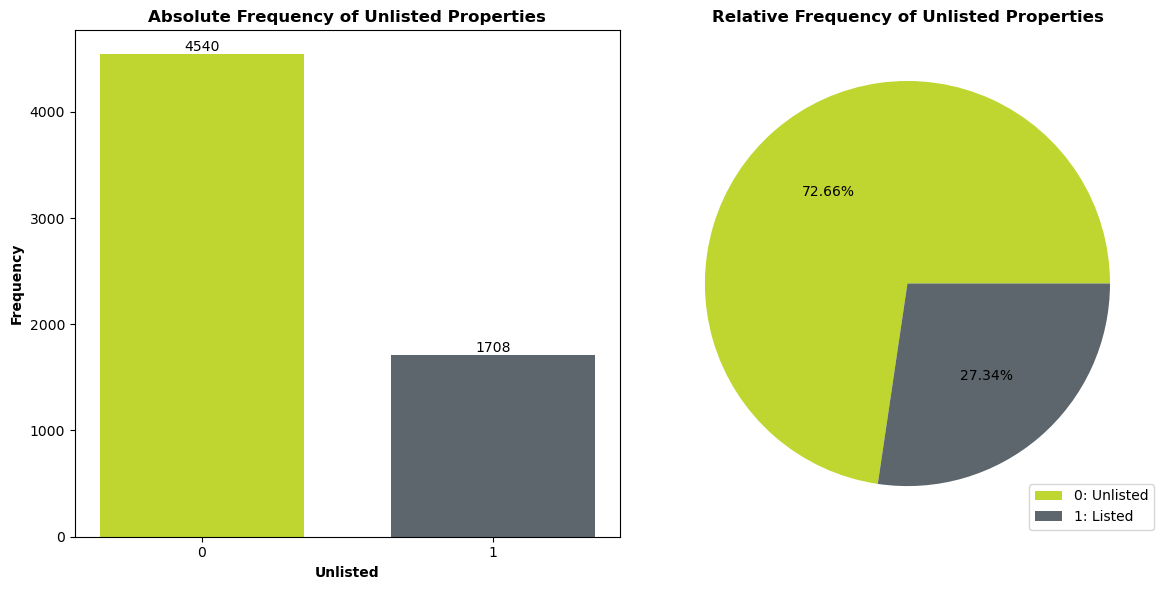

In [41]:
# Data
unlisted_counts = airbnb_df_train['unlisted'].value_counts()
total_properties = unlisted_counts.sum()
percentages = (unlisted_counts / total_properties) * 100

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for frequency
bar_colors = ['#BED62F', '#5C666C']
bar_labels = ['0', '1']
bars = axs[0].bar(unlisted_counts.index.astype(str), unlisted_counts, color=bar_colors, width=0.7)
axs[0].grid(False)
axs[0].set_title('Absolute Frequency of Unlisted Properties', fontweight='bold')
axs[0].set_xlabel('Unlisted', fontweight='bold')
axs[0].set_ylabel('Frequency', fontweight='bold')
axs[0].tick_params(axis='x', rotation=0)
axs[0].set_xticks(unlisted_counts.index)
axs[0].set_xticklabels(bar_labels)
for p in bars:
    axs[0].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

# Add legend
legend_labels = ['0: Unlisted', '1: Listed']

# Pie chart for percentages
pie_colors = ['#BED62F', '#5C666C']
wedges, texts, autotexts = axs[1].pie(percentages, autopct='%1.2f%%', colors=pie_colors)
axs[1].set_title('Relative Frequency of Unlisted Properties', fontweight='bold')

# Add legend
axs[1].legend(wedges, legend_labels, loc='lower right')

plt.tight_layout()
plt.show()


In [42]:
airbnb_df_train['unlisted'].value_counts(normalize=True)*100

unlisted
0    72.663252
1    27.336748
Name: proportion, dtype: float64

**Conclusions - Target Analysis:**
* No **mising values**  (i.e count = total number of lines)
* No **unexpected values** 
* There is a clear **unbalance**: around 73% of the training instances represent airbnb's that remain listed, while only 27% represent airbnb's that were unlisted.
    - This is an important characteristic of the data, as unbalanced data needs to be adressed so it does not affect the performance of our classification models.

#### **2.2.2 `description`**

##### **1) Overall Analysis**

In [43]:
airbnb_df_train['description'].describe()

count                                  6248
unique                                 6023
top       <b>License number</b><br />Exempt
freq                                     19
Name: description, dtype: object

In [44]:
airbnb_df_train['description'].isna().sum()

0

In [45]:
airbnb_df_train['description'].duplicated().sum()

225

**Conclusions**:
* The **most common description** is repeated 19 times, and there are 6023 unique property descriptions, so that there are **duplicated descriptions**.
* There are **no missing values**.



##### **2) Word Count** 
Turn text into words to better analyse it:
Turning our descriptions into tokens and counting how many tokens exist in each description:

In [46]:
airbnb_df_train['word_count_descr']  = airbnb_df_train['description'].apply(lambda x: len(str(x).split(" ")))
airbnb_df_train[['description','word_count_descr']].head() #number of tokens

,description,word_count_descr
index,,
1,"This is a shared mixed room in our hostel, wit...",127
2,"O meu espaço fica perto de Parque Eduardo VII,...",23
3,Trafaria’s House is a cozy and familiar villa ...,170
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",47
5,Joli appartement en bordure de mer.<br /> 2 m...,101


In [47]:
airbnb_df_train.word_count_descr.describe().round(2)

count    6248.00
mean      132.86
std        48.08
min         3.00
25%        99.00
50%       157.00
75%       167.00
max       210.00
Name: word_count_descr, dtype: float64

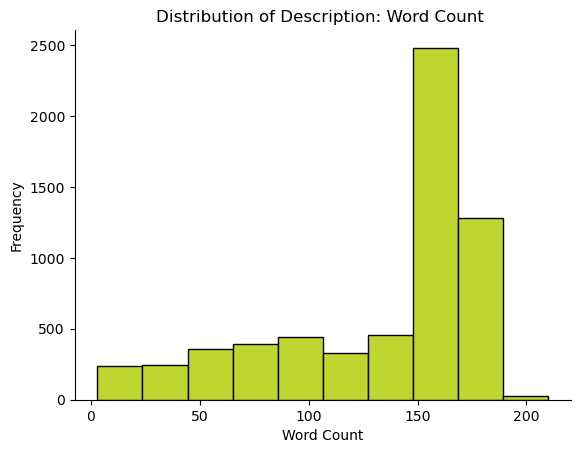

In [48]:
airbnb_df_train['word_count_descr'].hist(ec = 'black', color=['#BED62F'])
plt.grid(False)  
plt.title('Distribution of Description: Word Count ')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Conclusions**:
From these descriptive statistics and histogram, we can understand some interesting things about our data, such as:
- The largest description has 210 words
- The smallest description has only 3 words
- On average, descriptions have around 133 words
- The descripiton filed contains text with many different sizes, but is most commonly around [150,170] words.

##### **3) Word Analysis** 
We now analyse each word individually:

In [49]:
all_words_descr = ' '.join(airbnb_df_train['description']).split()

In [50]:
freq_descr = pd.Series(all_words_descr).value_counts() #see frequency of words

Cheking the **most common words**:

In [51]:
freq_descr.sort_values(ascending=False)[0:25]

the             31323
and             27698
a               25540
/><br           17380
to              15328
of              15122
in              13866
with            13649
is              12083
de               6918
apartment        6841
for              6153
you              6140
<br              5328
has              4863
space</b><br     4814
/><b>The         4670
from             4363
e                4288
/>The            4144
The              3426
are              3155
room             3016
located          2944
2                2937
Name: count, dtype: int64

Visualizing using a barplot:

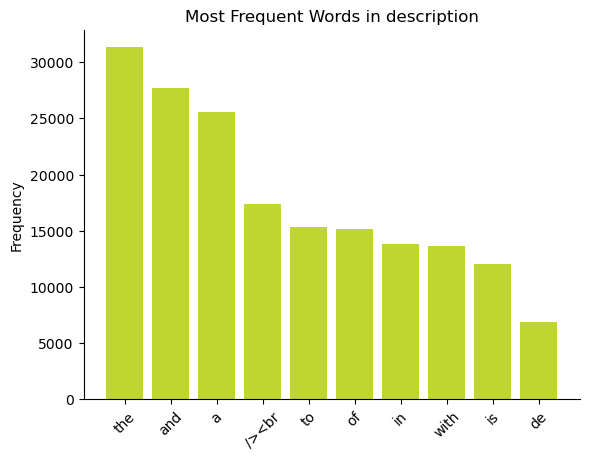

In [52]:
x_labels = freq_descr.index[0:10]
values = freq_descr[:10]
plt.bar(x_labels, values, color=['#BED62F'] )
plt.xticks(x_labels)
plt.ylabel('Frequency')
plt.title('Most Frequent Words in description')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

Visualizing using a word cloud:

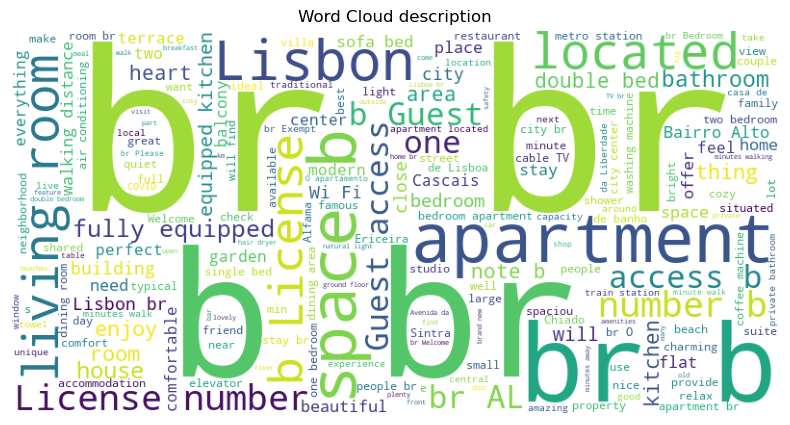

In [53]:
# Joining all the descriptions into a single string
all_reviews_descr = ' '.join(airbnb_df_train['description'])
    
# Create WordCloud object
wordcloud_descr = WordCloud(width=800, height=400, background_color="white").generate(all_reviews_descr)

#Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_descr)
plt.axis("off")
plt.title('Word Cloud description')
plt.show()

**Conclusions**:

There are clearly a lot of **uniformative words** that can be considered *stop words*, *tags* or *non-alphanumeric*, such as 'br', 'and' 'the'.\
These word should be correctly pre-processed as to not affect the outcome of our final analysis.

#### **2.2.3 `host_about`**

##### **1) Overall Analysis**

In [54]:
airbnb_df_train['host_about'].describe()

count                                                  6248
unique                                                 2803
top       We are Feels Like Home Holiday Rentals.\nA com...
freq                                                    153
Name: host_about, dtype: object

In [55]:
airbnb_df_train['host_about'].isna().sum()

0

In [56]:
airbnb_df_train['host_about'].duplicated().sum()

3445

**Conclusions**:
* There are only 2.803 **unique host_about descriptions**. This might be due to the fact that the same host might have many properties. Additionally, the **most common host_about** information is repeated 153 times.
* There are **no missing values**.

##### **2) Word Count** 
Repeat the process but this time for the variable *host_about*

In [57]:
airbnb_df_train['word_count_host']  = airbnb_df_train['host_about'].apply(lambda x: len(str(x).split(" ")))
airbnb_df_train[['host_about','word_count_host']].head() #number of tokens

,host_about,word_count_host
index,,
1,Alojamento Local Registro: 20835/AL,4
2,"I am friendly host, and I will try to always b...",24
3,"I am a social person liking to communicate, re...",45
4,Hello!_x000D_\nI m Portuguese and i love to me...,31
5,Nous sommes une famille avec deux enfants de 1...,37


In [58]:
airbnb_df_train.word_count_host.describe().round(2)

count    6248.00
mean       73.65
std        79.66
min         1.00
25%        26.00
50%        55.00
75%       101.00
max      1387.00
Name: word_count_host, dtype: float64

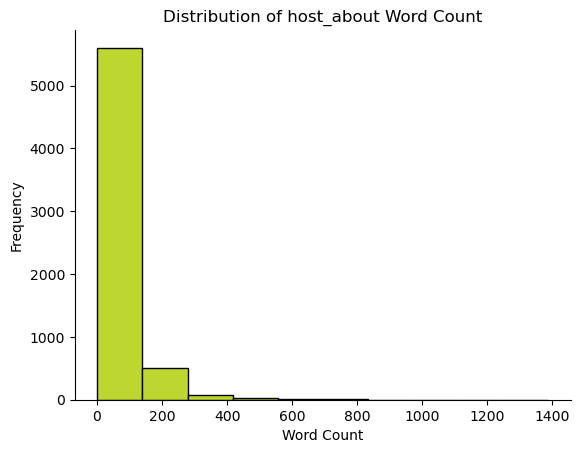

In [59]:
airbnb_df_train['word_count_host'].hist(ec = 'black', color=['#BED62F'])
plt.grid(False)  
plt.title('Distribution of host_about Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Conclusions**:
From these descriptive statistics and histogram, we can understand some interesting things about our data, such as:
- The largest description of the host has 1387 words
- The smallest description of the host has only 1 word
- On average, descriptions of the hosts  have around 74 words
- The *host_about* filed has generally smaller text [0,100] words, but also has extreme outliers with 10 times more words.

##### **3) Word Analysis** 
We now analyse each word individually:

In [60]:
all_words_host= ' '.join(airbnb_df_train['host_about']).split()

In [61]:
freq_host = pd.Series(all_words_host).value_counts() #see frequency of words

Cheking the most common words:

In [62]:
freq_host.sort_values(ascending=False)[0:20]

and        16358
to         13291
the        10797
a          10535
in          9860
of          6524
I           6419
you         6248
de          4325
We          4206
our         4004
e           3980
_x000D_     3971
for         3864
with        3819
is          3506
we          3481
are         2929
have        2825
my          2750
Name: count, dtype: int64

Visualizing using a barplot:

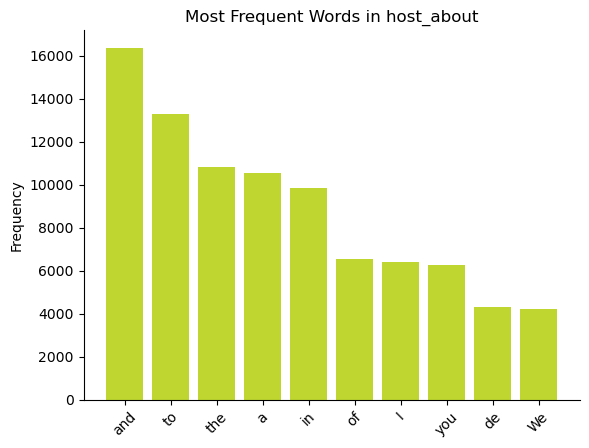

In [63]:
x_labels = freq_host.index[0:10]
values = freq_host[:10]
plt.bar(x_labels, values, color=['#BED62F'] )
plt.xticks(x_labels)
plt.ylabel('Frequency')
plt.title('Most Frequent Words in host_about')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

Visualizing using a word cloud:

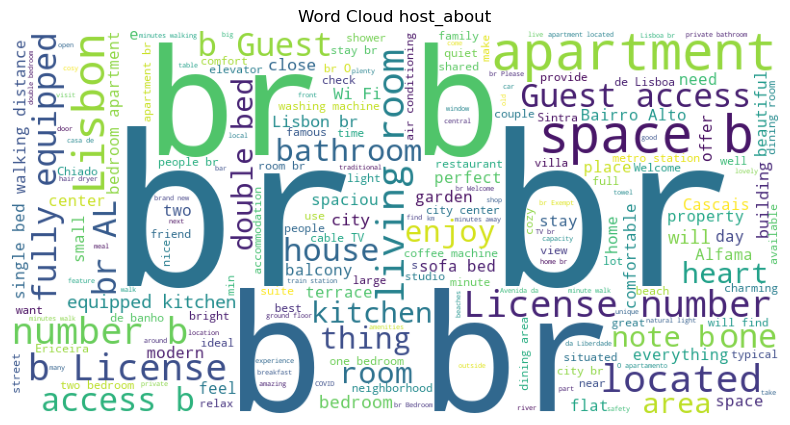

In [64]:
# Joining all the host_about into a single string
all_reviews_host = ' '.join(airbnb_df_train['host_about'])
    
# Create WordCloud object
wordcloud_descr = WordCloud(width=800, height=400, background_color="white").generate(all_reviews_descr)

#Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_descr)
plt.axis("off")
plt.title('Word Cloud host_about')
plt.show()

**Conclusions:**

There are clearly a lot of uniformative words that can be considered stop words, tags or non-alphanumeric, such as 'br', 'and' 'to'.\
These word should be correctly pre-processed as to not affect the outcome of our final analysis.

#### **2.2.4 `comments`**

##### **1) Overall Analysis**

In [65]:
airbnb_df_train_reviews['comments'].isna().sum()

2

In [66]:
rows_with_nan_comments = airbnb_df_train_reviews[airbnb_df_train_reviews['comments'].isna()]
rows_with_nan_comments

,index,comments
97996,1654,NaN
334443,5789,NaN


In [67]:
airbnb_df_train_reviews['comments'].duplicated().sum()

6781

**Conclusions:**

We have **2 missing values** and have **many duplicated values**.

##### **2) Word Count** 
Repeat the process but this time for the variable *comments*

In [68]:
airbnb_df_train_reviews['word_count_rev']  = airbnb_df_train_reviews['comments'].apply(lambda x: len(str(x).split(" ")))
airbnb_df_train_reviews[['comments','word_count_rev']].head() #number of tokens

,comments,word_count_rev
0,this is a very cozy and comfortable house to s...,28
1,good<br/>,1
2,"My first hostel experience, and all I have to ...",261
3,Das Hostel war neu und deshalb funktionierte a...,81
4,"It was fine for a dorm, but I think for the pe...",27


In [69]:
airbnb_df_train_reviews.word_count_rev.describe().round(2)

count    361281.00
mean         47.97
std          46.79
min           1.00
25%          18.00
50%          36.00
75%          63.00
max        1019.00
Name: word_count_rev, dtype: float64

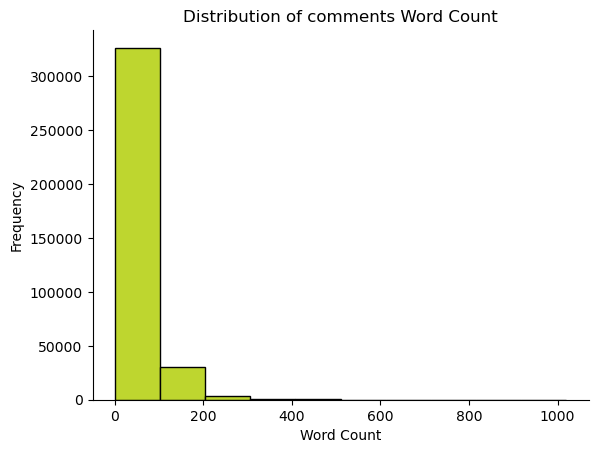

In [70]:
airbnb_df_train_reviews['word_count_rev'].hist(ec = 'black', color=['#BED62F'])
plt.grid(False)  
plt.title('Distribution of comments Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Conclusions**:
From these descriptive statistics and histogram, we can understand some interesting things about our data, such as:
- The largest comment has 1019 words
- The smallest comment has only 1 word
- On average, comments of the hosts  have around 48 words
- Just as with *host_about*, most *comments* have around [1,63] words but some outliers are 10 times bigger.

##### **3) Word Analysis** 
We now analyse each word individually:

In [71]:
#all_words_rev= ' '.join(airbnb_df_train_reviews['comments']).split()

The code line from above would not work as we are dealing with a variable with missing values encoded as *NaN*. This being said, we explore the problem further:

In [72]:
problematic_indices = []

for index, comment in airbnb_df_train_reviews['comments'].items():
    if isinstance(comment, float):
        problematic_indices.append(index)

problematic_rows = airbnb_df_train_reviews.loc[problematic_indices]
print(problematic_rows)

        index comments  word_count_rev
97996    1654      NaN               1
334443   5789      NaN               1


In [73]:
#The problem occurs because we have missing values, so let's no consider them (drop them)
comments_without_missing = airbnb_df_train_reviews['comments'].dropna()
all_words_rev = ' '.join(comments_without_missing).split()

In [74]:
freq_rev = pd.Series(all_words_rev).value_counts() #see frequency of words

Cheking the most common words:

In [75]:
freq_rev.sort_values(ascending=False)[0:15]

and          553157
the          515963
a            398631
to           328675
is           258191
in           249469
was          239807
of           174087
very         156654
The          143987
for          141658
de           139290
with         115782
apartment    114848
we            98283
Name: count, dtype: int64

Visualizing using a barplot:

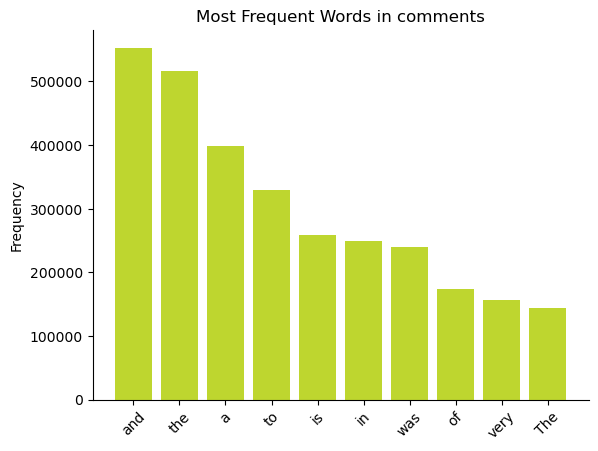

In [76]:
x_labels = freq_rev.index[0:10]
values = freq_rev[:10]
plt.bar(x_labels, values, color=['#BED62F'] )
plt.xticks(x_labels)
plt.ylabel('Frequency')
plt.title('Most Frequent Words in comments')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

Visualizing using a word cloud:

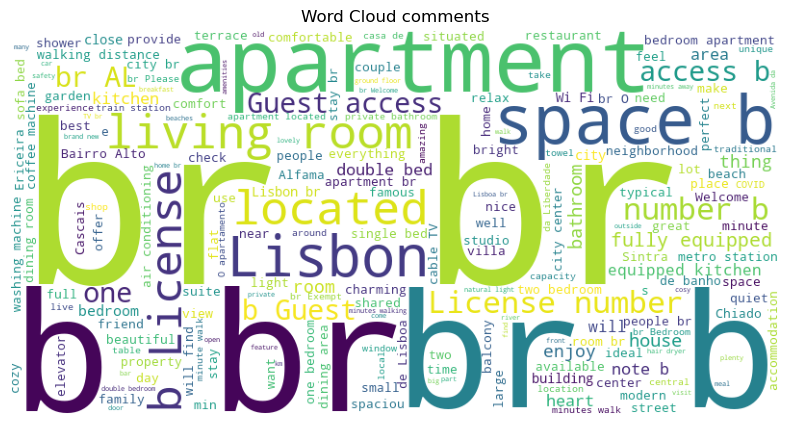

In [77]:
# Joining all the comments into a single string
all_reviews_rev = ' '.join(comments_without_missing)
    
# Create WordCloud object
wordcloud_descr = WordCloud(width=800, height=400, background_color="white").generate(all_reviews_descr)

#Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_descr)
plt.axis("off")
plt.title('Word Cloud comments')
plt.show()

**Note:**

Although we have conducted an analysis suggesting that comments may be important for unlisting, we acknowledge that sometimes comments can consist of empty strings, spaces, dots, or punctuation marks that don't provide useful information for our problem context. 
Therefore, let´s check comments with 5 or less characters and determine the number of such comments in the dataset.

In [78]:
feature = ['comments']

for entry in feature:
    #select only comments with a length less than 5 characters 
    short_values = airbnb_df_train_reviews[airbnb_df_train_reviews[entry].str.len() < 5][entry].unique()
    for comment in short_values:
        print(comment)

top
.
I
👍
Good
q
-
Top
bien
Bien
Bom.
非常满意
RAS
Bom
O
♥️
show
💚
ø
....
Na
🤙🏼
👍🏼
A
Si
...
nice
J
G
..
idem
Idem
😊
K
Ras
👌
å
Ok
Nice
Nee
****
Xxx
/
5/5
👍🏼👍🏼
:-)
L
r
🙂
!
Hi
Top!
…
🔝
Bb
👍🏻
Best
좋습니다
Nul
❤️
10
🇵🇹
x
nvt
´
!!!
NC
Ok.
E
 ...
no
😍😍😍
좋았음
🙏🏻
xxx
good
👌👌👌
ok
:)
很接地气
,
OK
N.
No
X
👍👍👍
We
D
n
非常完美
Hduj
aa
non
5*
אש
Kind
N/a
C
Gut
👍👍
좋아요
👌🏻👌🏻
S
6*!!
1
Omit
Cool
Amei
N
nada
😎😎😎😎
  . 
A+++
😉
Gh
+
Goed
Z
👌🏼👌🏼
非常好
Xx
1A
M
•
🔝🔝🔝
. 
GG
A*
👌🏾
Hh
Fab!
都很好！
挺好的
非常好👍
非常干净
_
v
cfgx
B
A a
P
五星推荐
‘
T
✌️🪨
Tks
🙏
رائع
2/5
***
Gos
5🌟
Top 
Ds
…..
✔️
👍👍👍👍
  👌🏻
😘
Ok😊
a
5⭐️
;-))
Nada
👌🏻
?
좋아요!
1 A
gut
Df
Nn
TB
🙌🏻
Veld
SN
+++👍
top!
✨
🙌🏾
0
Boa
Test
Ya
无
<3
😀
很舒适
100%
👍👌
💗
5 ⭐️
🤗
g
Grat
tnx
👌🏽
Aaaa
很好
Oui
👍🏽
☹️👎🏽
5*!
ooo
🤨
  C
Q
👌👌
还可以
Fine
Mega
Okay
**
体验不错
Thx
👍🏼👏🏼
we
i
5✨
9
Nvt
ciao
👍🏾
N/à
非常喜欢
位置不错
hu
👌🏼
👌👍
Apa
U
Todo
R
p
很干净
boa
d
--
BIEN
8.0
👍🏻🤟🏻
The 
Mhe
none
SO
cool
👏🏻
bom
好
很棒！
超赞！
9/10
Bom!
c
n/A
xx
..!
Yes!
ppp
Arnm
*
H
Yo
Guay
😉👌
The
☹️
🤟👍
🎷🦫
–
—-
Www
RAS.
: )
Boa.
yes
Very
Hyvä
5 ⭐
Fair
top.
Boa!

**Conclusions:**
There are clearly a lot of uniformative words that can be considered stop words, tags, emojis or non-alphanumeric, such as 'br', 'and' 'the'.\
 These words should be correctly pre-processed as to not affect the outcome of our final analysis.

### **2.3 Multi-Language Analysis**

As was noted earlier, our text is written in many different languages. An important step of our analysis is to understand the proportions in which each language is present in our text, as to select the best approach going forward.

There are many possible libraries that can be used to detect languages from a string. Considering the following article: https://medium.com/@monigrancharov/text-language-detection-with-python-beb49d9667b3 , using *LangDetect* is seen as the appropriate choice:

In [79]:
def detect_language_with_langdetect(text):
    """
    This function recieves as input a piece of text and return the language it corresponds to.
    It uses Langdetect as the detection algorithm.
    """
    try:
        return detect(text) # return the language with highest probability
    except: return "Unknown" # if does not recognise language

In [80]:
#Identifying the language of "description" & "host_about" in airbnb_df_train
airbnb_df_train['desc_lang'] = airbnb_df_train['description'].apply(detect_language_with_langdetect)
airbnb_df_train['ha_lang']=airbnb_df_train['host_about'].apply(detect_language_with_langdetect)

In [81]:
airbnb_df_train[['desc_lang', 'ha_lang' ]].describe().T

,count,unique,top,freq
desc_lang,6248,12,en,5106
ha_lang,6248,29,en,4446


In [82]:
#Identify language of "comments" in airbnb_df_train_reviews
airbnb_df_train_reviews['com_lang'] = airbnb_df_train_reviews['comments'].apply(detect_language_with_langdetect)

Saving our data into a csv so it is faster to acces it in the future:

In [83]:
airbnb_df_train.to_csv('airbnb_df_train_lang.csv', index=False)
airbnb_df_train_reviews.to_csv('airbnb_df_train_reviews_lang.csv', index=False)

In [84]:
airbnb_df_train_reviews['com_lang'].describe()

count     361281
unique        44
top           en
freq      232321
Name: com_lang, dtype: object

Checking our dataframes:

In [85]:
airbnb_df_train.head()

,description,host_about,unlisted,word_count_descr,word_count_host,desc_lang,ha_lang
index,,,,,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,127,4,en,pt
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,23,24,pt,en
3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,170,45,en,en
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,47,31,pt,en
5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,101,37,fr,fr


In [86]:
airbnb_df_train_reviews.head()

,index,comments,word_count_rev,com_lang
0,1,this is a very cozy and comfortable house to s...,28,en
1,1,good<br/>,1,cy
2,1,"My first hostel experience, and all I have to ...",261,en
3,1,Das Hostel war neu und deshalb funktionierte a...,81,de
4,1,"It was fine for a dorm, but I think for the pe...",27,en


Having each languages identified, we further analyse these variables:

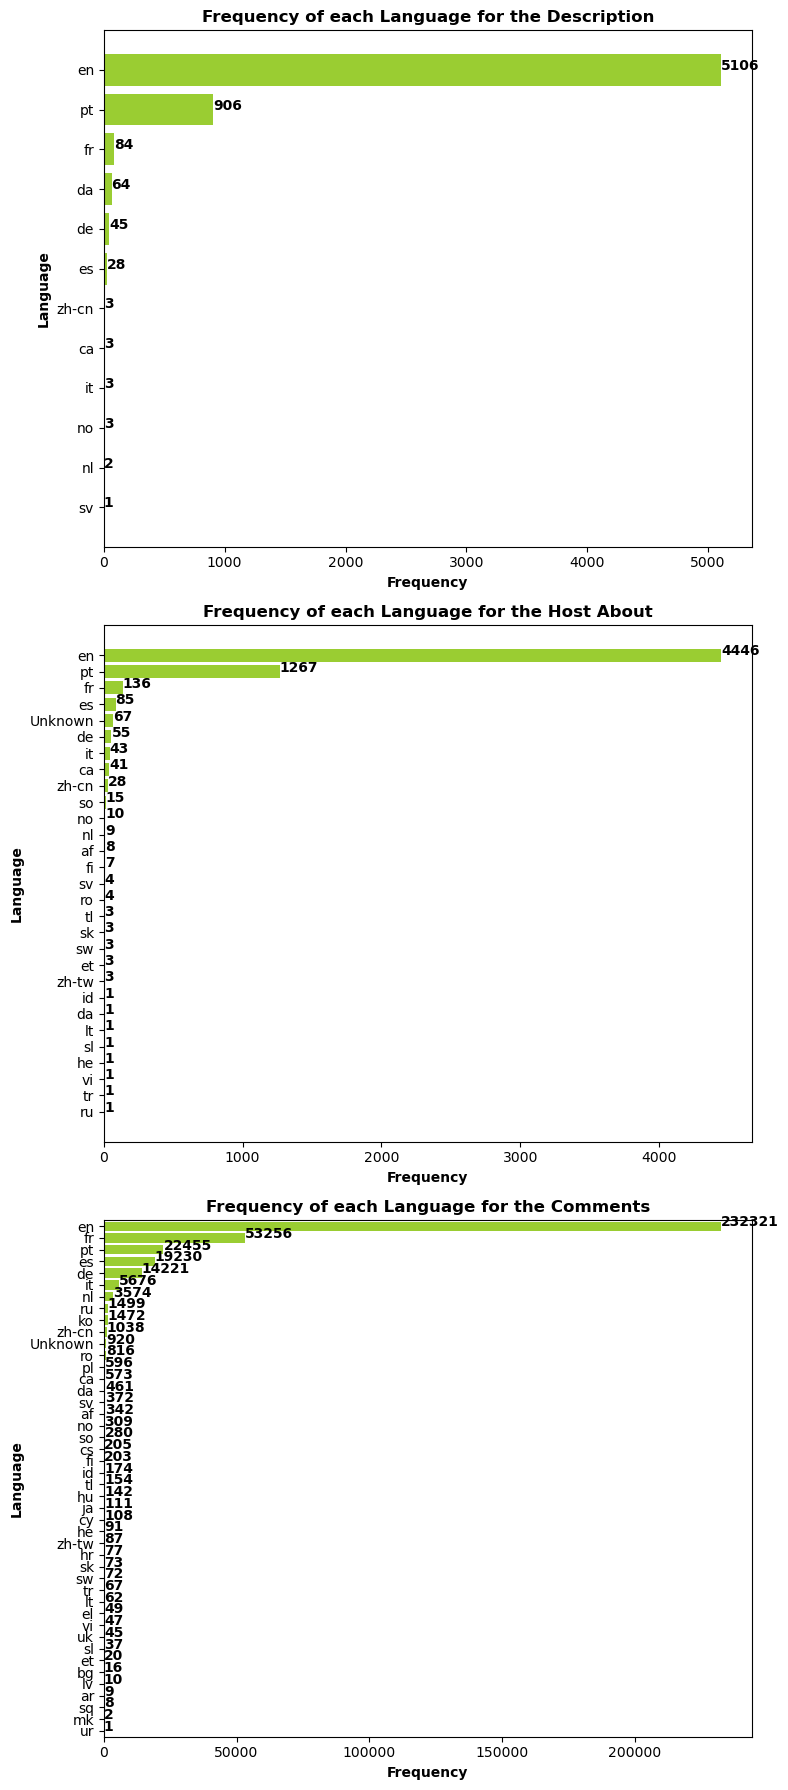

In [87]:
# Data
desc_lang_counts = airbnb_df_train['desc_lang'].value_counts()
ha_lang_counts = airbnb_df_train['ha_lang'].value_counts()
com_lang_counts = airbnb_df_train_reviews['com_lang'].value_counts()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(8, 18))

# Horizontal bar plot for description language
desc_lang_counts_sorted = desc_lang_counts.sort_values(ascending=True)
axs[0].barh(desc_lang_counts_sorted.index, desc_lang_counts_sorted, color='yellowgreen')
axs[0].grid(False)
axs[0].set_title('Frequency of each Language for the Description', fontweight='bold')
axs[0].set_xlabel('Frequency', fontweight='bold')
axs[0].set_ylabel('Language', fontweight='bold')

for i, v in enumerate(desc_lang_counts_sorted):
    axs[0].text(v + 0.2, i, str(v), color='black', fontweight='bold')

# Horizontal bar plot for host about language
ha_lang_counts_sorted = ha_lang_counts.sort_values(ascending=True)
axs[1].barh(ha_lang_counts_sorted.index, ha_lang_counts_sorted, color='yellowgreen')
axs[1].grid(False)
axs[1].set_title('Frequency of each Language for the Host About', fontweight='bold')
axs[1].set_xlabel('Frequency', fontweight='bold')
axs[1].set_ylabel('Language', fontweight='bold')

for i, v in enumerate(ha_lang_counts_sorted):
    axs[1].text(v + 0.2, i, str(v), color='black', fontweight='bold')

# Horizontal bar plot for comment language
com_lang_counts_sorted = com_lang_counts.sort_values(ascending=True)
axs[2].barh(com_lang_counts_sorted.index, com_lang_counts_sorted, color='yellowgreen')
axs[2].grid(False)
axs[2].set_title('Frequency of each Language for the Comments', fontweight='bold')
axs[2].set_xlabel('Frequency', fontweight='bold')
axs[2].set_ylabel('Language', fontweight='bold')

for i, v in enumerate(com_lang_counts_sorted):
    axs[2].text(v + 0.2, i, str(v), color='black', fontweight='bold')

# Adjusting vertical scale for comments language plot
axs[2].set_ylim(-0.5, len(com_lang_counts_sorted) - 0.5)

plt.tight_layout()
plt.show()


Regarding the distribution of relative frequency, we'll create pie charts. However, for better interpretation, each chart will only represent languages with a representation above 5%. All others will be included in the "Others" category.

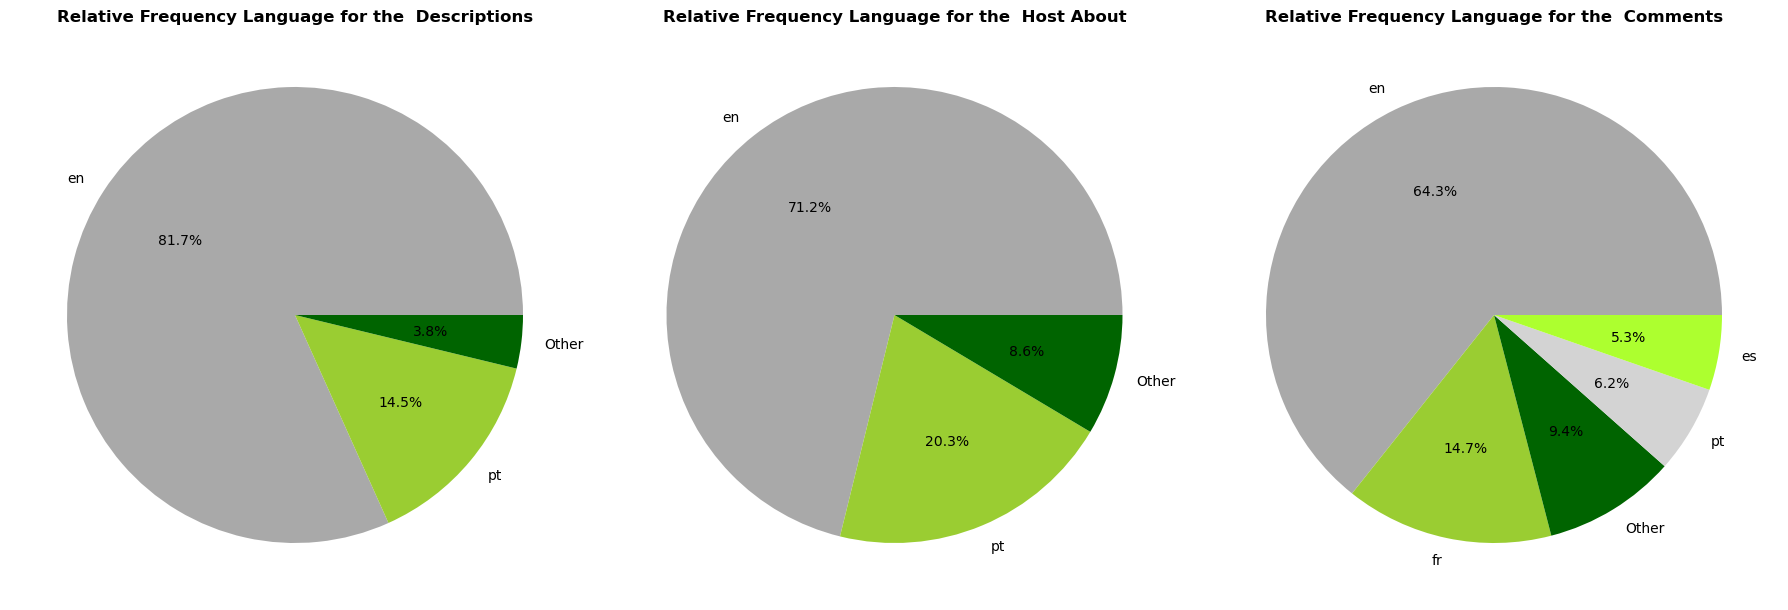

In [88]:
# let's aggregate all the languages in less than 5% of the data for each column in one category called other

#Function to aggregate the small categories
def aggregate_categories(counts):
    total_count = counts.sum()
    filtered_counts = counts[counts / total_count * 100 > 5]
    other_count = total_count - filtered_counts.sum()
    return filtered_counts, other_count

# Counts
desc_lang_counts = airbnb_df_train['desc_lang'].value_counts()
ha_lang_counts = airbnb_df_train['ha_lang'].value_counts()
com_lang_counts = airbnb_df_train_reviews['com_lang'].value_counts()

# Aggregate small categories
desc_lang_counts_filtered, desc_lang_others = aggregate_categories(desc_lang_counts)
ha_lang_counts_filtered, ha_lang_others = aggregate_categories(ha_lang_counts)
com_lang_counts_filtered, com_lang_others = aggregate_categories(com_lang_counts)

# Create temporary columns
airbnb_df_train['desc_lang_temp'] = airbnb_df_train['desc_lang'].apply(lambda x: x if x in desc_lang_counts_filtered else 'Other')
airbnb_df_train['ha_lang_temp'] = airbnb_df_train['ha_lang'].apply(lambda x: x if x in ha_lang_counts_filtered else 'Other')
airbnb_df_train_reviews['com_lang_temp'] = airbnb_df_train_reviews['com_lang'].apply(lambda x: x if x in com_lang_counts_filtered else 'Other')



# Use the temporary columns to plot the pie charts
desc_lang_counts_temp = airbnb_df_train['desc_lang_temp'].value_counts()
ha_lang_counts_temp = airbnb_df_train['ha_lang_temp'].value_counts()
com_lang_counts_temp = airbnb_df_train_reviews['com_lang_temp'].value_counts()

# Define colors
colors = ['darkgrey','yellowgreen', 'darkgreen', 'lightgrey', 'greenyellow']

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for description language
axs[0].pie(desc_lang_counts_temp, labels=desc_lang_counts_temp.index, autopct='%1.1f%%', colors=colors)
axs[0].set_title('Relative Frequency Language for the  Descriptions', fontweight='bold')

# Pie chart for host about language
axs[1].pie(ha_lang_counts_temp, labels=ha_lang_counts_temp.index, autopct='%1.1f%%', colors=colors)
axs[1].set_title('Relative Frequency Language for the  Host About', fontweight='bold')

# Pie chart for comment language
axs[2].pie(com_lang_counts_temp, labels=com_lang_counts_temp.index, autopct='%1.1f%%', colors=colors)
axs[2].set_title('Relative Frequency Language for the  Comments', fontweight='bold')

plt.tight_layout()
plt.show()


**Conclusion**

|                        |    Description  |     Host About    |        Comments |
|---                     |         ---     |           ---     |   ---           |
| # Distintic languages  |        12       |       30          |  44
| +/-95 %   |    en-pt        |      en-pt       |  en-fr-pt-es |


### **2.4  Checking for URL's, dates and emojis:**

Our text can include url's and dates that need to be normalized. An analysis is performed to better understand the presence of these elements in the text:

##### **URL:**

https://www.geeksforgeeks.org/python-check-url-string/

In [89]:
def Find(string):
    # with valid conditions for urls in string
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex, string)
    return [x[0] for x in url]

In [90]:
def find_count_url(data):
    url = []
    for text in data:
        if Find(text)!= []:
            url.append(Find(text)),
    return len(url), url

In [91]:
print('Description has',find_count_url(airbnb_df_train['description'])[0], 'URLs.')
print('host_about has',find_count_url(airbnb_df_train['host_about'])[0], 'URLs.')
print('Comments have', find_count_url(comments_without_missing)[0], 'URLs')

Description has 23 URLs.
host_about has 37 URLs.
Comments have 51 URLs


Example of present Url:

In [92]:
find_count_url(comments_without_missing)[1]

[['https://packathon.in'],
 ['https://abnb.me/aIxlMuJU9ib'],
 ['http://www.tripadvisor.com/Restaurant_Review-g3874225-d6957429-Reviews-Manteigaria-Lisbon_District_Central_Portugal.html'],
 ['www.Turisma.pt'],
 ['https://www.aartedaterra.pt/en/'],
 ['www.travelhotspots.nl'],
 ['http://lisboaautentica.com/fr/'],
 ['https://de.wikipedia.org/wiki/Mouraria'],
 ['http://www.figaroslisboa.com'],
 ['https://www.yelp.com/biz/time-out-market-lisboa'],
 ['www.gosoohi.com'],
 ['https://www.airbnb.com/rooms/6353661'],
 ['https://www.youtube.com/watch?v=SzHHsbJ_LyM'],
 ['https://www.mafrense.pt/FileGet.aspx?FileId=6610'],
 ['https://www.youtube.com/channel/UCe5Kl8UQH0OXC9KuJ9PzkLw?view_as=subscriber'],
 ['http://www.hamburgueriadobairro.pt'],
 ['https://www.facebook.com/CurtindoPortugal/'],
 ['https://www.visitportugal.com/en/content/festas-de-lisboa'],
 ['http://www.conserveiradelisboa.pt/en'],
 ['www.facebook.com/avelhagaiteira'],
 ['https://goo.gl/maps/x3abCKBrnDR2'],
 ['www.portugalicious.pt'],


There is a clear presence of url's in our data that needs to de dealt with accordingly.

#### **Dates:**

Finding dates can be a more complex approach, since dates can come in many formats. Nevertheless, in a first approach, a simple function is created to find dates with the typical yyyy-mm-dd or dd-mm-yyyy format.

In [133]:
def find_dates(data):
    date_patterns = [
        r'\d{4}-\d{2}-\d{2}',      # YYYY-MM-DD
        r'\d{4}/\d{2}/\d{2}',      # YYYY/MM/DD
        r'\d{2}/\d{2}/\d{4}',      # MM/DD/YYYY
        r'\d{2}-\d{2}-\d{4}',      # DD-MM-YYYY
    ]
    
    dates = []
    for text in data:
        for pattern in date_patterns:
            date_matches = re.findall(pattern, text)
            if date_matches:
                dates.extend(date_matches)
    return len(dates), dates


In [134]:
print('There are',find_dates(airbnb_df_train['description'])[0], 'dates in description', find_dates(airbnb_df_train['description'])[1])
print('There are',find_dates(airbnb_df_train['host_about'])[0], 'dates in host_about', find_dates(airbnb_df_train['host_about'])[1])
print('There are',find_dates(comments_without_missing)[0], 'dates in comments', find_dates(comments_without_missing)[1])

There are 4 dates in description ['27/03/2022', '10/04/2022', '24/06/2020', '01-01-2019']
There are 0 dates in host_about []
There are 19 dates in comments ['26/11/2018', '06/12/2018', '20-06-2013', '25-06-2013', '17/10/2016', '18/02/2022', '11/03/2018', '01/09/2018', '05/09/2018', '2018-08-08', '2018-08-13', '26/01/2018', '30/05/2019', '07/07/2015', '22/07/2019', '02/01/2019', '2017-04-05', '2017-04-05', '25/08/2022']


It is clear that there are dates in our text data. This format needs to be dealt with accordingly.

#### **Emojis**:

We start by checking the presence of emjois made by chracters such as :) :

In [273]:
#create a list of writen emojis to look for:
emoji_write = [':)',':(',':(',':D',':P',';)',':*','<3',':|',':-)',':-(',':-D',':-P',';-)',':-*',':-|',':-O',':-[',':-]',':^)',':3',':\')',':>',':o',':-o','O_O','T_T',':\'(','D:',':-[']

In [274]:
def find_emojicons(data):
    emoji_pattern = re.compile('|'.join(re.escape(pattern) for pattern in emoji_write))  # compile turns patterns that are strings into regex pattern objects
    emojis = []
    count_entries = 0
    for text in data:
        s=0
        emoji_matches = emoji_pattern.findall(text)
        if emoji_matches:
            s+=1
            emojis.extend(emoji_matches)
        if s!=0:
            count_entries+=1
    return len(emojis), set(emojis), count_entries

In [275]:
print('There are',find_emojicons(airbnb_df_train['description'])[0], 'emojis in description', find_emojicons(airbnb_df_train['description'])[1],'in',find_emojicons(airbnb_df_train['description'])[2],'descriptions' )
print('There are',find_emojicons(airbnb_df_train['host_about'])[0], 'emojis in host_about', find_emojicons(airbnb_df_train['host_about'])[1],'in', find_emojicons(airbnb_df_train['host_about'])[2], 'host_about')
print('There are',find_emojicons(comments_without_missing)[0], 'emojis in comments', find_emojicons(comments_without_missing)[1], 'in',find_emojicons(comments_without_missing)[2], 'comments')

There are 266 emojis in description {':-)', ':(', ';-)', ':3', '<3', 'D:', ':)', ';)', ':o'} in 222 descriptions
There are 733 emojis in host_about {':-)', ';-)', '<3', ':D', ':-D', ':)', ';)'} in 616 host_about
There are 19914 emojis in comments {':P', ':-P', ';-)', 'D:', ":'(", ':-D', ':)', ':^)', ':-(', '<3', ":')", ':>', ':|', ':*', ':D', ';)', ':o', ':-)', ':(', ':3', ':-*'} in 18252 comments


There are many writen emojis writen in our text.

And we now look into actual emojis:

In [182]:
def find_emojis(data):
    all_unique_emojis = set()
    count_entries = 0
    for text in data:
        unique_emojis = {char for char in text if char in emoji.EMOJI_DATA}
        all_unique_emojis.update(unique_emojis)
        if unique_emojis:
            count_entries+=1

    return  len(all_unique_emojis), all_unique_emojis, count_entries

In [184]:
print('There are',find_emojis(airbnb_df_train['description'])[0], 'emojis in description', find_emojis(airbnb_df_train['description'])[1],'in',find_emojis(airbnb_df_train['description'])[2],'descriptions' )
print('There are',find_emojis(airbnb_df_train['host_about'])[0], 'emojis in host_about', find_emojis(airbnb_df_train['host_about'])[1],'in', find_emojis(airbnb_df_train['host_about'])[2], 'host_about')
print('There are',find_emojis(comments_without_missing)[0], 'emojis in comments', find_emojis(comments_without_missing)[1], 'in',find_emojis(comments_without_missing)[2], 'comments')

There are 30 emojis in description {'🏖', '☺', '✅', '☝', '🌉', '😂', '🤗', '✈', '▪', '♥', '💙', '🙌', '®', '🥳', '🌴', '⭐', '❤', '📡', '💯', '☀', '🚇', '☑', '🚕', '😊', '🚙', '⚠', '🚗', '😉', '✔', '🙂'} in 36 descriptions
There are 1 emojis in host_about {'✈'} in 1 host_about
There are 307 emojis in comments {'⛱', '🧐', '👎', '💕', '🙏', '🎄', '🍋', '🚉', '🗺', '🍄', '😇', '👯', '😩', '🔴', '🧳', '✨', '😚', '🐭', '💫', '😗', '😱', '🌉', '🦋', '✈', '🐝', '🙈', '🍀', '🔑', '🍺', '💯', '🧚', '🌸', '😓', '🚵', '🚎', '😀', '🪨', '✝', '🍷', '🥴', '🍞', '🙋', '🏆', '💤', '🥮', '🏝', '🐬', '👨', '💥', '🧼', '‼', '🔐', '🎂', '🐶', '💨', '🌺', '🤜', '👞', '🫶', '🧗', '🍰', '😕', '🤌', '👉', '🉐', '🍦', '💔', '🚂', '🤗', '🎻', '🚀', '💩', '💦', '😒', '🕉', '🎀', '🤣', '👩', '☕', '💭', '😛', '🔆', '🏽', '🌅', '🕺', '🦁', '🍴', '🏿', '💎', '🥳', '♂', '❤', '🎈', '🤔', '🎒', '🏖', '💋', '✅', '🏰', '🥵', '🐐', '🎇', '📱', '🫱', '💗', '😏', '🐱', '🤓', '🤷', '🥣', '🌱', '👃', '🍕', '🤞', '🖤', '💃', '🤨', '🦜', '🏾', '👀', '👊', '💐', '👌', '😊', '🌼', '🌲', '➕', '🌶', '🚋', '🍮', '🥞', '❗', '🌄', '😴', '💻', '🤟', '⭐', '🎥', '👆', '🥂', '🙁', '

There is also a very clear number of actual emojis in our dataset. Both types of emojis should be dealt with accordingly.

### **2.5  Conclusions Data Exploration:**
- Target variable *unlisted* is unbalaned (73/27);
- Text fields appear in many languages ( the majority in english and portuguese);
- Duplicated entries will be considered different properties;
- Missing values were found for the field *comments*;
- All text fileds have many stop words, tags and non-alphanumeric words that should be removed for a better analysis.
- There are URL's and Dates included in our text variables.


------

## **3. Data Preprocessing**

<div class="alert alert-block alert-success"> <a id = "preprocessing"></a>

### **REQUIREMENTS** 

- Split Training corpus intro train/validation sets (or also K-Fold Cross Validation or others);
- Implement at least 4 preprocessing techniques (stop words, regular expressions, lemmatization, stemming, …)
- Apply more data exploration after preprocessing.

Extra work: 0.25 points for each extra method (unseen in class) - max 2 methods
1. Normalization:
- Replace links with special token
- Normalize dates
- Regular expressions

2. LowerCasing

3. Tokenization
- Coumpounds
- Punctuation
4. Remove Stop-Words

5. Stemming and lemmatisation
6. POS filtering


###  **3.1 Importing Dataset:**

**Assumption**: Given our initial analysis we decided to use **comments** for predicting unlisting and also **description**, since not all houses have comments. 

In [429]:
# Change path as you need

# Working with exported data:
airbnb_train = pd.read_csv('../airbnb_df_train_lang.csv')
airbnb_train_reviews= pd.read_csv('../airbnb_df_train_reviews_lang.csv')

In [430]:
airbnb_train.head()

,description,host_about,unlisted,word_count_descr,word_count_host,desc_lang,ha_lang
0,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,127,4,en,pt
1,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,23,24,pt,en
2,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,170,45,en,en
3,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,47,31,pt,en
4,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,101,37,fr,fr


We don't need the word_count variables anymore, so they are removed:

In [431]:
columns_to_drop=['word_count_descr', 'word_count_host', 'host_about', 'ha_lang']
airbnb_train.drop(columns=columns_to_drop, axis=1, inplace=True)
airbnb_train.head()

,description,unlisted,desc_lang
0,"This is a shared mixed room in our hostel, wit...",0,en
1,"O meu espaço fica perto de Parque Eduardo VII,...",1,pt
2,Trafaria’s House is a cozy and familiar villa ...,1,en
3,"Apartamento Charmoso no Chiado, Entre o Largo ...",0,pt
4,Joli appartement en bordure de mer.<br /> 2 m...,0,fr


In [432]:
airbnb_train_reviews.head()

,index,comments,word_count_rev,com_lang
0,1,this is a very cozy and comfortable house to s...,28,en
1,1,good<br/>,1,cy
2,1,"My first hostel experience, and all I have to ...",261,en
3,1,Das Hostel war neu und deshalb funktionierte a...,81,de
4,1,"It was fine for a dorm, but I think for the pe...",27,en


In [433]:
airbnb_train_reviews.drop(columns='word_count_rev', axis=1, inplace=True)
airbnb_train_reviews.head()

,index,comments,com_lang
0,1,this is a very cozy and comfortable house to s...,en
1,1,good<br/>,cy
2,1,"My first hostel experience, and all I have to ...",en
3,1,Das Hostel war neu und deshalb funktionierte a...,de
4,1,"It was fine for a dorm, but I think for the pe...",en


-----

###  **3.3  Treating Missing Values:**

Let's start by dealing with the missing values found:

In [434]:
# Replace the missing values for blankspaces ('')
airbnb_train_reviews['comments'] = airbnb_train_reviews['comments'].fillna('')
# Replace the missing values for 'Unknown'
airbnb_train_reviews['com_lang'] = airbnb_train_reviews['com_lang'].fillna('Unknown')

In [435]:
airbnb_train_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361281 entries, 0 to 361280
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     361281 non-null  int64 
 1   comments  361281 non-null  object
 2   com_lang  361281 non-null  object
dtypes: int64(1), object(2)
memory usage: 8.3+ MB


###  **3.4  Inconsistency Treatment**

#### **3.4.1  EMOJIS**

#### Written Emojis:

We start by focusing on writen emojis. \
For this type of emojis, a dictionay is created to change the emojis by the respective word/feeling:

https://towardsdatascience.com/emojis-aid-social-media-sentiment-analysis-stop-cleaning-them-out-bb32a1e5fc8e

In [436]:
emoji_dict = {
    ':)': 'Happy',
    ':(': 'Sad',
    ':(':'Sad',
    ':D': 'Happy',
    ':P': 'Playful',
    ';)': 'Happy',
    ':*': 'Kiss',
    '<3': 'Love',
    ':|': 'Neutral',
    ':-)': 'Happy',
    ':-(': 'Sad',
    ':-D': 'Happy',
    ':-P': 'Playful',
    ';-)': 'Happy',
    ':-*': 'Kiss',
    ':-|': 'Neutral',
    ':-O': 'Surprise',
    ':-[': 'Sad',
    ':-]': 'Happy',
    ':^)': 'Happy',
    ':3': 'Cute',
    ':\')': 'Happy',
    ':>': 'Happy',
    ':o': 'Surprise',
    ':-o': 'Surprise',
    'O_O': 'Surprise',
    'T_T': 'Sad',
    ':\'(': 'Sad',
    'D:': 'Sad',
    ':-[': 'Sad'
}

In [437]:
def replace_emojis_with_feelings(text, emoji_dict):
    emoji_pattern = re.compile('|'.join(re.escape(pattern) for pattern in emoji_dict.keys())) #compile turns patterns that are strings into regex pattern objects
    text = emoji_pattern.sub(lambda match: emoji_dict[match.group()], text) #lambda function gets each substring from our pattern matched using .group()
    return text


#Testing
text = "This house made me really :). Just amazing :D; :'(!"
text = replace_emojis_with_feelings(text, emoji_dict)
print("Modified text:", text)


Modified text: This house made me really Happy. Just amazing Happy; Sad!


We can apply this to the clean function when dealing with the english language.

#### Emojis:

We now look into actual emojis.\
To do so, once again, we use the emoji library:
Source: https://towardsdatascience.com/emojis-aid-social-media-sentiment-analysis-stop-cleaning-them-out-bb32a1e5fc8e#ff68

In [438]:
text = "hummmm 🧐, don't relly know 👎, if i 💕 the house. Thanks to the host tho 🙏"
new = emoji.replace_emoji(text, replace=lambda chars, data_dict: ' '.join(data_dict['en'].split('_')).strip(':'))
no_emoji = emoji.replace_emoji(text, '')
new, no_emoji

("hummmm face with monocle, don't relly know thumbs down, if i two hearts the house. Thanks to the host tho folded hands",
 "hummmm , don't relly know , if i  the house. Thanks to the host tho ")

We have tested replacing emoji's with the respective description. This line of code can be added to the clean function.\
It's important to note that this methos also works for a couple of other languages so, when implementing this shoud be considered.Languages where this library is not defined, will just delete the emojis.

###  **3.6 Cleaning Data:**

#### **3.6.1 Multi-Languages Senario:**

Since we are dealing with multi-language, we need to define a dictionary that gives us a language and the respective stop-words:

Checking `description` languages:

In [439]:
languages_descp = airbnb_train['desc_lang'].unique()
languages_descp

array(['en', 'pt', 'fr', 'es', 'de', 'da', 'no', 'sv', 'ca', 'zh-cn',
       'it', 'nl'], dtype=object)

Checking `comments` languages:

In [440]:
languages_com = airbnb_train_reviews['com_lang'].unique()
languages_com

array(['en', 'cy', 'de', 'fr', 'es', 'pt', 'ru', 'nl', 'it', 'ko',
       'zh-cn', 'he', 'Unknown', 'id', 'pl', 'no', 'so', 'da', 'sq', 'ro',
       'ca', 'hr', 'ja', 'zh-tw', 'tl', 'cs', 'ar', 'af', 'sk', 'sv',
       'sw', 'hu', 'el', 'sl', 'fi', 'vi', 'lv', 'uk', 'lt', 'et', 'tr',
       'mk', 'bg', 'ur'], dtype=object)

There is more variability of languages in *'comments'* than in *'description'*. <br>
However it doesn't mean that all of the languages of *'descriptions'* are represented on *'comments'*, so we will check for it:

In [441]:
# For loop to check if a some 'description' language is, or not, on 'comments' languages:
s=0
for lang in languages_descp:
    if lang not in languages_com:
        s+=1
s

0

Since all languages are present in the comments, we use only comments to infer which would be the best library to use:

#### NLTK:

In [442]:
# fileids is a way to read the corpus fileids (in this case available in nltk)
print('There are:', len(stopwords.fileids()), 'languages available in nltk:', stopwords.fileids())

There are: 29 languages available in nltk: ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [443]:
# Dictionary of 'comments' languages available in nltk
lang_dict = {
'ar': 'arabic',
'ca': 'catalan',
'da': 'danish',
'nl': 'dutch',
'en': 'english',
'fi': 'finnish',
'fr': 'french',
'de': 'german',
'el': 'greek',
'he': 'hebrew',
'hu': 'hungarian',
'id': 'indonesian',
'it': 'italian',
'no': 'norwegian',
'pt': 'portuguese',
'ro': 'romanian',
'ru': 'russian',
'sl': 'slovene',
'es': 'spanish',
'sv': 'swedish',
'tr': 'turkish',
}

print('There are', len(lang_dict), 'languages compatible wiht the nltk library')

There are 21 languages compatible wiht the nltk library


#### SPACY:

From our languages, spacy only has available the folowing ones:\
Source: https://spacy.io/usage/models

In [444]:
models_spacy = {
    'en': 'en_core_web_sm',
    'cy':None,
    'de': 'de_core_news_sm',
    'fr': 'fr_core_news_sm',
    'es': 'es_core_news_sm',
    'pt': 'pt_core_news_sm',
    'ru': 'ru_core_news_sm',
    'Unkown': None,
    'nl': 'nl_core_news_sm',
    'it': 'it_core_news_sm',
    'ko': 'ko_core_news_sm',
    'zh-cn': 'zh_core_web_sm', 
    'he': None,
    'id': None,
    'pl': 'pl_core_news_sm',
    'no': 'nb_core_news_sm', 
    'so': None,
    'da': 'da_core_news_sm',
    'sq': None, 
    'ro': 'ro_core_news_sm',
    'ca': 'ca_core_news_sm',
    'hr': 'hr_core_news_sm',
    'ja': 'ja_core_news_sm',
    'zh-tw': None,
    'tl': None,
    'cs': None,
    'ar': None,
    'af': None,
    'sk': None,
    'sv': 'sv_core_news_sm',
    'sw': None,
    'hu': None,
    'el': 'el_core_news_sm',
    'sl': 'sl_core_news_sm',
    'fi': 'fi_core_news_sm',
    'vi': None,
    'lv': None,
    'uk': 'uk_core_news_sm',
    'lt': 'lt_core_news_sm',
    'et': None,
    'tr': None,
    'mk': 'mk_core_news_sm',
    'bg': None,
    'ur': None
}
def count_available_languages(models_spacy):
    count = sum(model is not None for model in models_spacy.values())
    return count

# Example usage:
available_languages_count = count_available_languages(models_spacy)
print('There are', available_languages_count, 'compatible languages with our dataset')

There are 24 compatible languages with our dataset


Considering that spacy contains more languages available to use, we will implement stopwords using this library. Nevertheless, since some languages not available in Spacy are available in NLTK, this library will be used for those cases:

Downloading the available models:

In [445]:
"""
for lang_code, model_name in models_spacy.items():
    if model_name:
        spacy.cli.download(model_name)
        print(f"Downloaded model '{model_name}' for language '{lang_code}'")
    else:
        print(f"No SpaCy model available for language '{lang_code}'")
"""

'\nfor lang_code, model_name in models_spacy.items():\n    if model_name:\n        spacy.cli.download(model_name)\n        print(f"Downloaded model \'{model_name}\' for language \'{lang_code}\'")\n    else:\n        print(f"No SpaCy model available for language \'{lang_code}\'")\n'

Testing the use of spacy for dealing with **stopwords**:

https://spotintelligence.com/2022/12/10/stop-words-removal/#2_SpaCy_stop_words

In [446]:
# Load the language model
nlp = spacy.load("en_core_web_sm")

# Process the text
text = "This airbnb was amazing, i really believe you would love to come here!!! But not during the last week of january, it's mine!"
doc = nlp(text)

text = " ".join(token.text for token in doc if not token.is_stop)
text

'airbnb amazing , believe love come ! ! ! week january , !'

We can now apply this to our clean function:

#### **3.6.2 Cleaning function** - `clean_column`

Our clean fuction will deal the following issues:
* **1) HTML Tags**

    One of the problems detected was the presence of HTML tags in the documents, so we will remove it using the **Beautiful Soup** library.

    * **Beautiful Soup**: Python library used for parsing HTML and XML documents, providing convenient methods for navigating, searching, and modifying the parse tree.
    * documentation: https://www.crummy.com/software/BeautifulSoup/bs4/doc/
    * https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string

* **2) URL:**  we dedcided to convert URLS into Token
* **3) Stop Words**
* **4) Lemmatizing**
* **5) Stemming**
* **6) Others:** lowercase, punctuation, spefic accent characters, non-alphabetic character 



In [501]:
def clean_column(my_dataset, my_column, my_column_lang, lemmatize, stemmer ):
    """
    This fuction performs the cleaning of a specified text column of a certain datframe, considering the languange and other factors
    
    Arguments:
    - my_dataset: input Dataframe
    - my_column: input Datframe's column that it's going to be cleaned 
    - my_column_lang: input Datframe's column that identifies the language of the text in my_column
    - lemmatize: bool variable whose value indicates when to preform lemmatization
    - stemmer: bool variable whose value indicates when to perform stemming.
    Returns:
    - A dictionary where the key: "index of the input DataFrame" and the value: "modified text"
    """
    # __________Initialization____________

    # 1) output:empty dictionary to store cleaned texts
    cleaned_text ={}
    
    # 2) Root Character
    replacements = {
    'a': ['à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ā'],
    'e': ['è', 'é', 'ê', 'ë', 'ē'],
    'i': ['ì', 'í', 'î', 'ï'],
    'o': ['ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'œ'],
    'u': ['ù', 'ú', 'û', 'ü', 'ū', 'ů'],
    'c': ['ç'],
    'n': ['ñ'],
    's': ['ś', 'š', 'ß'],
    'z': ['ź', 'ż', 'ž']
    }

    # __________Iteration_________________

    for idx, row in tqdm(my_dataset.iterrows(), total=len(my_dataset)):
        #1) Get the information needed
        text = row[my_column] #Indetification of the text to clean
        language_code = row[my_column_lang] #Indefitication of code of the language of that text
        language = lang_dict.get(language_code, '')# Retrieve the language name from the dictionary using the language code
        
        #2) Lowercasing text:
        text = text.lower()

        #3) Tokenize URL's:
        url_re =r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
        text = re.sub(url_re, 'URL', text)   

        #4)Pre-processing words: 
        #-- 4.1 Using BeautifulSoup to remove raw text such as HTML tags:
        try:
            if "<" in text and ">" in text:  # Simple check for potential HTML content
                text = BeautifulSoup(text, 'html.parser').text
        except Exception as e:
            text = text
            continue

        #-- 4.2 Treat written emojis (such as :))
        if language_code == 'en': #only applied to english
            emoji_pattern = re.compile('|'.join(re.escape(pattern) for pattern in emoji_dict.keys())) #compile turns patterns that are strings into regex pattern objects
            text = emoji_pattern.sub(lambda match: emoji_dict[match.group()], text) #lambda function gets each substring from our pattern matched using .group()
    
        #-- 4.3 Treat figure emojis
        try: #if emoji library accepts language change emoji
            text = emoji.replace_emoji(text, replace=lambda chars, data_dict: ' '.join(data_dict[language_code].split('_')).strip(':'))
        except (LookupError, OSError): #else erase emoji
            text = emoji.replace_emoji(text, '')

        #5) Replacements 
        #-- 5.1 Replace specific characters with their root character in "replacements"
        for root_char, list_char_ in replacements.items():
            for variant_char in list_char_:
                text = text.replace(variant_char, root_char)

        #-- 5.2 Replace '?' with token
        text = re.sub('\?', '[interrogation]', text)
        #-- 5.3 Replace '!' with token
        text = re.sub('\!', '[exclamation]', text)
        #-- 5.4 Replace numbers with token
        text = re.sub('\d+', '[number]', text) 

        #6) Final Removing 
        #-- 6.1 Remove all non-alphabetic (Ex: dates) 
        text = re.sub("[^a-zA-Z]"," ", text) 
        #-- 6.2 Remove meaningless characters
        text = re.sub(" br ", "<br>", text) #to avoid bright becoming <br>ight
        
        #-- 6.3 Remove stopwords
        try: #try using spacy library
            nlp = spacy.load(models_spacy[language_code])
            doc = nlp(text)
            text = " ".join(token.text for token in doc if not token.is_stop)
        except Exception:
            try:
                stop = set(stopwords.words(language.lower()))
                text = " ".join([word for word in text.split() if word not in stop])
            except Exception:
                #text = text
                continue
        #-- 6.4 Lemmatize: turns into root word
        if lemmatize: 
            try:
                model_name = f"{language_code}_core_news_sm" 
                nlp=spacy.load(model_name, disable=["parser", "ner"])
                doc = nlp(text)
                text = " ".join(token.lemma_ for token in doc)
            except Exception: #if language is not in spacy, proceed
                #lemma = WordNetLemmatizer() 
                #text = " ".join(lemma.lemmatize(word) for word in text.split())
                text = text #would not work without this line

        #-- 4.6 Stemming: only cuts some letters
        if stemmer:
            try:
                from nltk.stem import SnowballStemmer
                stemmer = SnowballStemmer(language)
                text = " ".join(stemmer.stem(word) for word in text.split())
            except ImportError:
                continue  # Skip stemming if SnowballStemmer is not available

        #6) Add to the text cleaned_text dictionary the pair (key, text)
        key = idx# Get the index of the row
        cleaned_text[key] = text

    return  cleaned_text

### Testing with chinese:

In [502]:
airbnb_train_reviews[1345:1348]

,index,comments,com_lang
1345,25,Sandra est chaleureuse et disponible. L’appart...,fr
1346,25,房間打掃很乾淨,zh-tw
1347,25,"Locatie is perfect, appartement ook, Sandra is...",nl


In [499]:
test_clean = clean_column(airbnb_train_reviews[1345:1348], "comments", 'com_lang', lemmatize=True, stemmer = False) 

100%|██████████| 3/3 [00:05<00:00,  1.74s/it]


In [500]:
test_clean

{1345: 'sandrer chaleureux disponible . appartemer conforme description . bien situer , calme , place martim moniz commerce ( petit marche , boulangerie , lidl , auchan … ) . fond epicerie appreciabl . chambre fenetre [ number ] porte assurer ventilation . passer agreabl sejour bien profit balcon .',
 1347: 'locatie perfect , appartement , sandra hulpvaardig vriendelijk .'}

**IT IS NOT WORKING FOR LANGUAGES NOT IN ANY DICTIONARY.... LIKE CHINESE**

Cleaning our descriptions:

In [493]:
clean_airbnb_description = clean_column(airbnb_train[:20], "description", "desc_lang", lemmatize=True, stemmer=False)

 20%|██        | 4/20 [00:01<00:06,  2.52it/s]


KeyboardInterrupt: 

Cleaning our comments:

In [ ]:
clean_airbnb_comments = clean_column(airbnb_train_reviews, "comments", "com_lang", lemmatize=True, stemmer=False)

Checking results:

In [ ]:
airbnb_train_reviews['comments'][4]

In [ ]:
clean_airbnb_comments[3]

In [99]:
#Add the new column with clean text and revome the old
airbnb_train['cleaned_description'] = airbnb_train.index.map(clean_airbnb_description.get)
#airbnb_train = airbnb_train.drop(columns=['comments'])


In [295]:
#Description
#train
x_train_cleaned_des = clean_column(airbnb_train_combined, "description", "desc_lang", lang_dict, lemmatize=True, stemmer=False)
#validation
#x_val_cleaned_des = clean_column(X_val, "description", "desc_lang", lang_dict, lemmatize=True, stemmer=False)

  0%|          | 75/363284 [00:37<50:17:12,  2.01it/s] 


KeyboardInterrupt: 

In [103]:
#Add the new column with clean text and revome the old
X_train['cleaned_description'] = X_train.index.map(x_train_cleaned_des.get)
X_val['cleaned_description'] = X_val.index.map(x_val_cleaned_des.get)
X_train = X_train.drop(columns=['description'])
X_val= X_val.drop(columns=['description'])

In [104]:
X_train.head(2)

,index,desc_lang,com_lang,cleaned_comments,cleaned_description
46176,815,en,it,casa piccola accogliente funzionale pu aver bi...,renewed apartment perfect guest day exploring ...
242910,4150,en,fr,jour tr bien roul appartement bien situ bien a...,apartment aut ntico min away miradouro sophia ...


In [105]:
X_val.head(2)

,index,desc_lang,com_lang,cleaned_comments,cleaned_description
34957,607,en,en,apartment great base first trip city plenty sp...,apartment located one oldest building fantasti...
329351,5685,en,en,great apartment bang middle everything apartme...,location location located heart lisbon fanquei...


In [108]:
#Let's check for missing values
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254298 entries, 46176 to 251842
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                254298 non-null  int64 
 1   desc_lang            254298 non-null  object
 2   com_lang             254298 non-null  object
 3   cleaned_comments     248875 non-null  object
 4   cleaned_description  254255 non-null  object
dtypes: int64(1), object(4)
memory usage: 11.6+ MB


In [109]:
#Let's check for missing values
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108986 entries, 34957 to 332104
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                108986 non-null  int64 
 1   desc_lang            108986 non-null  object
 2   com_lang             108986 non-null  object
 3   cleaned_comments     106643 non-null  object
 4   cleaned_description  108965 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.0+ MB


In [112]:
# Replace the missing values for blankspaces ('')
#Train
X_train['cleaned_comments'] = X_train['cleaned_comments'].fillna('')
X_train['cleaned_description'] = X_train['cleaned_description'].fillna('')

#Validation
X_val['cleaned_comments'] = X_val['cleaned_comments'].fillna('')
X_val['cleaned_description'] = X_val['cleaned_description'].fillna('')

In [113]:
#Saving the results of cleaning
#Train
X_train.to_csv('X_train.csv', index=False)
#Validation
X_val.to_csv('X_val.csv', index=False)

#### **3.6.3 Removing uniformative rows:**
uniformative row: is a rows that do not contain neither comment or description

In [115]:
# Check for empty strings in 'description' and 'comment' columns in X_train
train_empty_rows = X_train[(X_train['cleaned_description'] == '') & (X_train['cleaned_comments'] == '')]

# Check for empty strings in 'description' and 'comment' columns in X_val
val_empty_rows = X_val[(X_val['cleaned_description'] == '') & (X_val['cleaned_comments'] == '')]

# Print the results
print("Empty rows in 'description' and 'comment' columns in X_train:")
print(train_empty_rows)

print("\nEmpty rows in 'description' and 'comment' columns in X_val:")
print(val_empty_rows)

Empty rows in 'description' and 'comment' columns in X_train:
        index desc_lang com_lang cleaned_comments cleaned_description
134932   2271     zh-cn  Unknown                                     
176748   2988     zh-cn  Unknown                                     
134914   2271     zh-cn       ru                                     

Empty rows in 'description' and 'comment' columns in X_val:
Empty DataFrame
Columns: [index, desc_lang, com_lang, cleaned_comments, cleaned_description]
Index: []


In [116]:
X_train.drop(train_empty_rows.index, inplace=True)

#### **3.6.4  Small descriptions**

In [121]:
# Check for small descriptions in 'cleaned_description' column in X_train
train_small_descriptions = X_train[X_train['cleaned_description'].str.len() <= 3]

# Check for small descriptions in 'cleaned_description' column in X_val
val_small_descriptions = X_val[X_val['cleaned_description'].str.len() <= 3]

# Print the results
print("Rows with small descriptions in 'cleaned_description' column in X_train:")
print(train_small_descriptions['cleaned_description'].unique())

print("\nRows with small descriptions in 'cleaned_description' column in X_val:")
print(val_small_descriptions['cleaned_description'].unique())


Rows with small descriptions in 'cleaned_description' column in X_train:
['']

Rows with small descriptions in 'cleaned_description' column in X_val:
['']


**Conclusion:** There are no small descriptions except the ones that we set ' '

#### **3.6.5  Small comments:**

In [122]:
# Check for small descriptions in 'cleaned_description' column in X_train
train_small_descriptions = X_train[X_train['cleaned_comments'].str.len() <= 3]

# Check for small descriptions in 'cleaned_description' column in X_val
val_small_descriptions = X_val[X_val['cleaned_comments'].str.len() <= 3]

# Print the results
print("Rows with small descriptions in 'cleaned_comments' column in X_train:")
print(train_small_descriptions['cleaned_comments'].unique())

print("\nRows with small descriptions in 'cleaned_comments' column in X_val:")
print(val_small_descriptions['cleaned_comments'].unique())

Rows with small descriptions in 'cleaned_comments' column in X_train:
['' 'ra' 'x d' 'ok' 'bom' 'top' 'osb' 'i' 'nee' 'boa' 'hi' 'nvt' 'gut'
 'ant' 'nul' 'hyv' 'yes' 'p s' 'd' 'see' 'go' 'xix' 'g' 'gg' 'b' 'gh' 'yo'
 'na' 'n' 'rui' 'aaa' 'mhe' 'ppp' 'usb' 'c' 's' 'try' 'we' 'j' 'si' 'jan'
 'u' 'ja' 'no' 'ana' 'oui' 'un' 'a c' 'bon' 'co' 'gem' 'h']

Rows with small descriptions in 'cleaned_comments' column in X_val:
['' 'bom' 'isi' 'c' 'top' 'v' 'gut' 'ra' 'boa' 'x d' 'g' 'r' 'ok' 'b' 'go'
 'sn' 'ask' 'bem' 'let' 'p s' 'i' 'wow' 's' 'nvt' 'ue' 'bbq' 'df' 'd' 'bb']


In [123]:
##Devemos remover????? (fiquei aqui Mariana)

#como extras para trás falta remover emojis 
#podemos dar um tratamento especial a datas

----

### Feature Engineering: <br>
if 4. then ## 4. Feature Engineering <br>

Implement and experiment with 2 of feature engineering techniques (TF-IDF, GloVe embedding, …).

Extra work: 1 point for each extra method using Transformed-based embedding.- max 2 methods



-----

### Classification Models:
Implement and test 3 of the classification algorithms seen in class (KNN, LR, MLP, LSTM, …).

Extra work: 1 point for each extra model using Transformers or other advanced models - max 2 methods.



- Use KNN as baseline

----

### Evaluation:
Evaluate with, at least, Recall, Precision, Accuracy and F1-Score.
